<a href="https://colab.research.google.com/github/LilianeEff/Data205/blob/main/EDA_for_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
import folium
from folium.plugins import HeatMap

**Datasets used**

The School dataset lists all the schools in the counties along with their performance.
The location dataset has the cities in which the schools are located.

In [47]:
school=pd.read_csv("https://raw.githubusercontent.com/LilianeEff/Data205/refs/heads/main/Datasets/FY2013_MSDE_School_Participation_Indicators_-_All_Schools_20250208.csv")
location=pd.read_csv("https://raw.githubusercontent.com/LilianeEff/Data205/refs/heads/main/Datasets/Public_Schools.csv")



For the third dataset, an API request had to be sent to the Census Bureau. This dataset comprises the median home value in cities surrounding Montgomery County.

In [48]:
import requests

# Census API endpoint
url = "https://api.census.gov/data/2022/acs/acs5"

# Parameters for API request
params = {
    "get": "NAME,B25077_001E",  # NAME = City Name, B25077_001E = Median Home Value
    "for": "place:*",           # Get all places (cities/towns)
    "in": "state:24",           # Maryland (state:24)
}

# API request
response = requests.get(url, params=params)

# Check if request was success
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    df = pd.DataFrame(data[1:], columns=data[0])  # Convert to Pandas DataFrame
    df["B25077_001E"] = pd.to_numeric(df["B25077_001E"], errors="coerce")  # Convert median home value to numeric

    # Manually filter cities in Montgomery County
    montgomery_cities = [
        "Chevy Chase", "Chevy Chase Section Five",
        "Chevy Chase Section Three", "Aspen Hill", "Damascus", "Chevy Chase View", "Chevy Chase Village",
        "Gaithersburg", "Clarksburg", "Olney", "Garrett Park", "Glen Echo", "Kensington", "Laytonsville",
        "Martins Additions", "North Chevy Chase", "Poolesville", "Rockville",
        "Somerset", "Takoma Park", "white Oak", "Washington Grove", "Silver Spring", "Bethesda", "Potomac", "Germantown",
    ]

    # Filter DataFrame for only Montgomery County cities
    df = df[df["NAME"].str.contains('|'.join(montgomery_cities), case=False, na=False)]

    # Rename columns for
    df = df.rename(columns={"NAME": "City", "B25077_001E": "Median Home Value"})
    df = df.reset_index(drop=True)  # Reset index for better display

    print(df)
else:
    print(f"Error: {response.status_code}", response.text)


                                           City  Median Home Value state  \
0                      Aspen Hill CDP, Maryland             495800    24   
1                        Bethesda CDP, Maryland            1088000    24   
2                    Chevy Chase town, Maryland            1616900    24   
3                     Chevy Chase CDP, Maryland            1159700    24   
4    Chevy Chase Section Five village, Maryland            1542900    24   
5   Chevy Chase Section Three village, Maryland            1555400    24   
6               Chevy Chase View town, Maryland            1181800    24   
7            Chevy Chase Village town, Maryland            2000001    24   
8                      Clarksburg CDP, Maryland             604000    24   
9                        Damascus CDP, Maryland             474800    24   
10                  Gaithersburg city, Maryland             472800    24   
11                  Garrett Park town, Maryland             909300    24   
12          

In [49]:
display(df)  #this is what the dataframe actually looks like. It does have a couple of columns that
             # are extraneous.

,City,Median Home Value,state,place
0,"Aspen Hill CDP, Maryland",495800,24,02825
1,"Bethesda CDP, Maryland",1088000,24,07125
2,"Chevy Chase town, Maryland",1616900,24,16620
3,"Chevy Chase CDP, Maryland",1159700,24,16625
4,"Chevy Chase Section Five village, Maryland",1542900,24,16720
5,"Chevy Chase Section Three village, Maryland",1555400,24,16730
6,"Chevy Chase View town, Maryland",1181800,24,16775
7,"Chevy Chase Village town, Maryland",2000001,24,16787
8,"Clarksburg CDP, Maryland",604000,24,17350
9,"Damascus CDP, Maryland",474800,24,21475


**Data cleaning**: removing the two columns that are not needed, and renaming the cities by omitting the extra letters attached to them from the df dataframe.

Eliminating elementary and middle schools from the school dataframe.

In [50]:
df = df.rename(columns={"NAME": "City", "B25077_001E": "Median Home Value"})
df = df.reset_index(drop=True)

# Remove 'state' and 'place' columns
if 'state' in df.columns:
        df = df.drop('state', axis=1)
if 'place' in df.columns:
        df = df.drop('place', axis=1)

display(df)


,City,Median Home Value
0,"Aspen Hill CDP, Maryland",495800
1,"Bethesda CDP, Maryland",1088000
2,"Chevy Chase town, Maryland",1616900
3,"Chevy Chase CDP, Maryland",1159700
4,"Chevy Chase Section Five village, Maryland",1542900
5,"Chevy Chase Section Three village, Maryland",1555400
6,"Chevy Chase View town, Maryland",1181800
7,"Chevy Chase Village town, Maryland",2000001
8,"Clarksburg CDP, Maryland",604000
9,"Damascus CDP, Maryland",474800


In [51]:
#Rename cities
df.loc[df['City'].str.contains('Germantown CDP', case=False), 'City'] = 'Germantown'
df.loc[df['City'].str.contains('Chevy Chase CDP', case=False), 'City'] = 'Chevy Chase'
df.loc[df['City'].str.contains('Chevy Chase Section Five Village', case=False), 'City'] = 'Chevy Chase Section Five'
df.loc[df['City'].str.contains('Chevy Chase Section Three Village', case=False), 'City'] = 'Chevy Chase Section Three'
df.loc[df['City'].str.contains('Chevy Chase View Town', case=False), 'City'] = 'Chevy Chase View'
df.loc[df['City'].str.contains('Bethesda CDP', case=False), 'City'] = 'Bethesda'
df.loc[df['City'].str.contains('Silver Spring CDP', case=False), 'City'] = 'Silver Spring'
df.loc[df['City'].str.contains('Washington Grove Town', case=False), 'City'] = 'Washington Grove'
df.loc[df['City'].str.contains('Potomac CDP', case=False), 'City'] = 'Potomac'
df.loc[df['City'].str.contains('Potomac Heights CDP', case=False), 'City'] = 'Potomac Heights'
df.loc[df['City'].str.contains('Potomac Park CDP', case=False), 'City'] = 'Potomac Park'
df.loc[df['City'].str.contains('Martins Addition CDP', case=False), 'City'] = 'Martins Addition'
df.loc[df['City'].str.contains('Damascus CDP', case=False), 'City'] = 'Damascus'
df.loc[df['City'].str.contains('Laytonsville Town', case=False), 'City'] = 'Laytonsville'
df.loc[df['City'].str.contains('Kensington Town', case=False), 'City'] = 'Kensington'
df.loc[df['City'].str.contains('Glen Echo Town', case=False), 'City'] = 'Glen Echo'
df.loc[df['City'].str.contains('Garrett Park Town', case=False), 'City'] = 'Garrett Park'
df.loc[df['City'].str.contains('Olney CDP', case=False), 'City'] = 'Olney'
df.loc[df['City'].str.contains('Clarksburg CDP', case=False), 'City'] = 'Clarksburg'
df.loc[df['City'].str.contains('Gaithersburg City', case=False), 'City'] = 'Gaithersburg'
df.loc[df['City'].str.contains('Takoma Park City', case=False), 'City'] = 'Takoma Park'
df.loc[df['City'].str.contains('Somerset Town', case=False), 'City'] = 'Somerset'
df.loc[df['City'].str.contains('South Kensington CDP', case=False), 'City'] = 'South Kensington'
df.loc[df['City'].str.contains('Rockville City', case=False), 'City'] = 'Rockville'
df.loc[df['City'].str.contains('Poolesville Town', case=False), 'City'] = 'Poolesville'
df.loc[df['City'].str.contains('North Betheda CDP', case=False), 'City'] = 'North Bethesda'
df.loc[df['City'].str.contains('North Chevy Chase Village', case=False), 'City'] = 'North Chevy Chase'
df.loc[df['City'].str.contains('North Potomac CDP', case=False), 'City'] = 'North Potomac'
df.loc[df['City'].str.contains('white Oak CDP', case=False), 'City'] = 'White Oak'
df.loc[df['City'].str.contains('Aspen Hill CDP', case=False), 'City'] = 'Aspen Hill'

display(df)

,City,Median Home Value
0,Aspen Hill,495800
1,Bethesda,1088000
2,"Chevy Chase town, Maryland",1616900
3,Chevy Chase,1159700
4,Chevy Chase Section Five,1542900
5,Chevy Chase Section Three,1555400
6,Chevy Chase View,1181800
7,"Chevy Chase Village town, Maryland",2000001
8,Clarksburg,604000
9,Damascus,474800


Since the dataframe 'school' lists all the schools in the county and we're only interested in the high schools, lets filter the other ones out.

In [52]:
school = school[~school['School Name'].str.endswith('ES')]
school = school[~school['School Name'].str.endswith('MS')]

display(school)


,School Year,School Number,School Name,Principal,Phone,Associate Superintendent,Cluster,Attendance Rate,Drop out rate,Mobility Rate (Entrants + Withdrawals),Grade 12 Documented Decision - College,Grade 12 Documented Decision - Employment,Grade 12 Documented Decision - Military,Grade 12 Documented Decision - College - Employment,Graduation Rate,Students Meeting University System of Maryland Requirements,Location 1
4,2014,951,Longview School,Ms. Michelle M. Mach,(301) 601-4830,Dr. LaVerne G. Kimball,Northwest,84.7,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,"13900 Bromfield Road\nGermantown, MD 20874\n(3..."
6,2014,551,Gaithersburg HS,Dr. Christine C. Handy-Collins,(301) 284-4500,Dr. Christopher S. Garran,Gaithersburg,92.4,10.1,16.9,85.6,5.0,5.0,60.9,76.9,64.9,"101 Education Boulevard\nGaithersburg, MD 2087..."
10,2014,125,Quince Orchard HS,Mrs. Carole A. Working,(301) 840-4686,Dr. Christopher S. Garran,Quince Orchard,94.7,5.0,8.3,94.1,5.0,5.0,58.9,88.3,82.7,"15800 Quince Orchard Road\nGaithersburg, MD 20..."
23,2014,249,Clarksburg HS,Mr. James P. Koutsos,(301) 444-3000,Dr. Christopher S. Garran,Clarksburg,95.0,6.5,10.4,92.7,5.0,5.0,61.9,88.6,71.8,"22500 Wims Road\nClarksburg, MD 20871\n(39.225..."
28,2014,789,Albert Einstein HS,Mr. James G. Fernandez,(301) 929-2200,Dr. Christopher S. Garran,Downcounty Consortium,93.7,12.1,12.8,89.7,5.0,5.0,65.0,79.5,61.8,"11135 Newport Mill Road\nKensington, MD 20895\..."
48,2014,424,Walter Johnson HS,Mrs. Jennifer A. Baker,(301) 803-7100,Dr. Christopher S. Garran,Walter Johnson,95.0,5.0,7.0,94.3,5.0,5.0,51.2,95.0,82.6,"6400 Rock Spring Drive\nBethesda, MD 20814\n(3..."
64,2014,799,Stephen Knolls School,"Ms. Kim Redgrave, Acting",(301) 929-2151,Ms. Bronda L. Mills,Downcounty Consortium,84.3,NaN,15.2,NaN,NaN,NaN,NaN,NaN,NaN,"10731 St Margaret's Way\nKensington, MD 20895\..."
71,2014,215,Carl Sandburg Learning Center,Ms. Marlene (Marlene) Kenny,(301) 279-8490,Dr. Myra J. Smith,Sherwood,93.5,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,"451 Meadow Hall Drive\nRockville, MD 20851\n(3..."
82,2014,406,Bethesda-Chevy Chase HS,Mrs. Karen L. Lockard,(240) 497-6300,Dr. Christopher S. Garran,Bethesda-Chevy Chase,95.0,5.0,7.0,94.8,5.0,5.0,41.4,94.4,87.7,"4301 East West Highway\nBethesda, MD 20814\n(3..."
85,2014,246,Northwest HS,Ms. E. Lancellotti (Lance) Dempsey,(301) 601-4660,Dr. Christopher S. Garran,Northwest,94.9,5.9,10.0,95.0,5.0,5.0,56.9,91.1,88.2,"13501 Richter Farm Road\nGermantown, MD 20874\..."


**Summary Statistics**

In [53]:
# Summary statistics for the 'school' dataset
school.describe()
school.info()

# Summary statistics for the 'location' dataset
location.describe()
location.info()

# Summary statistics for the 'df' dataset
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 4 to 200
Data columns (total 17 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   School Year                                                  32 non-null     int64  
 1   School Number                                                32 non-null     int64  
 2   School Name                                                  32 non-null     object 
 3   Principal                                                    32 non-null     object 
 4   Phone                                                        32 non-null     object 
 5   Associate Superintendent                                     32 non-null     object 
 6   Cluster                                                      31 non-null     object 
 7   Attendance Rate                                              32 non-null     float64
 

**Visualizations**

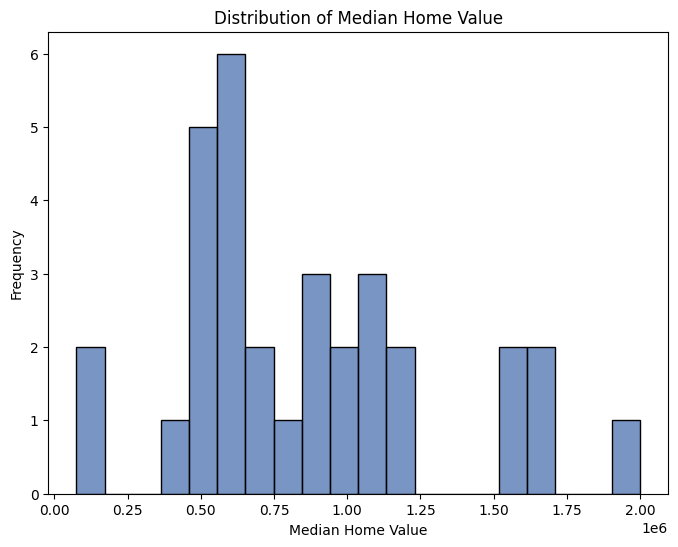

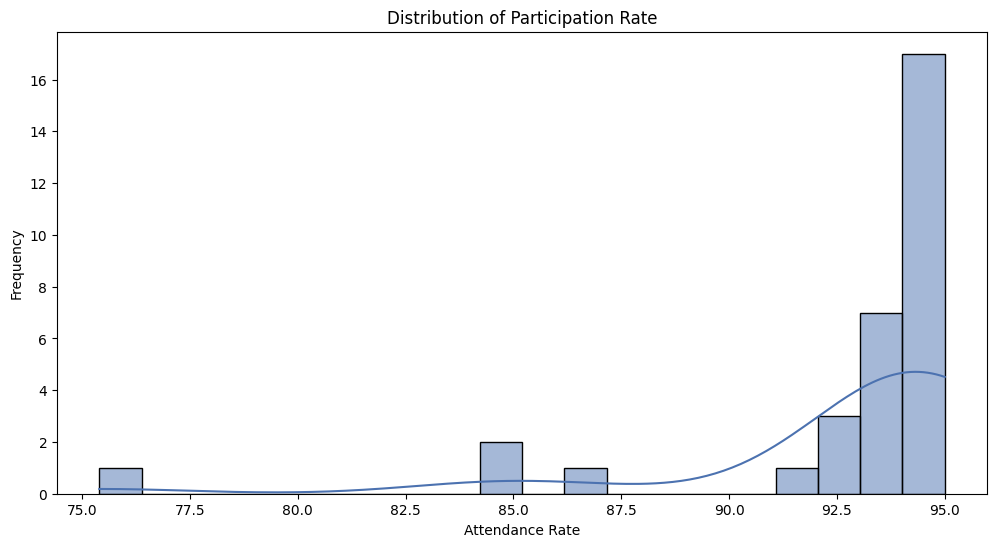

In [54]:
# Histogram for 'Median Home Value' in 'df'
plt.figure(figsize=(8, 6))
sns.histplot(df['Median Home Value'], bins=20)
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()

# Histograms for attendance rate in 'school'
plt.figure(figsize=(12, 6))
sns.histplot(school['Attendance Rate'], bins=20, kde=True)
plt.title('Distribution of Participation Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()



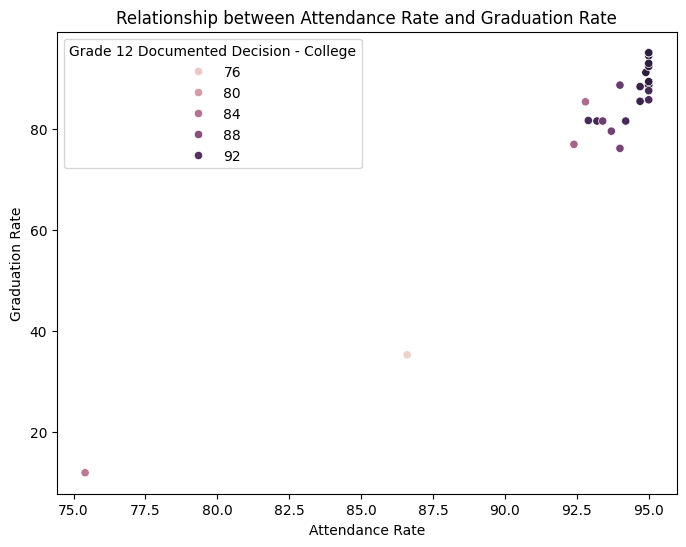

In [55]:
# Scatter plot to explore relationship between two attendance rate and graduation rate,
#colored depending on college admittance.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance Rate', y='Graduation Rate', data=school, hue='Grade 12 Documented Decision - College')
plt.title('Relationship between Attendance Rate and Graduation Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Graduation Rate')
plt.show()

<ipython-input-56-0e86c0b01a50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Median Home Value', y='City', data=df, orient='h', palette='viridis')


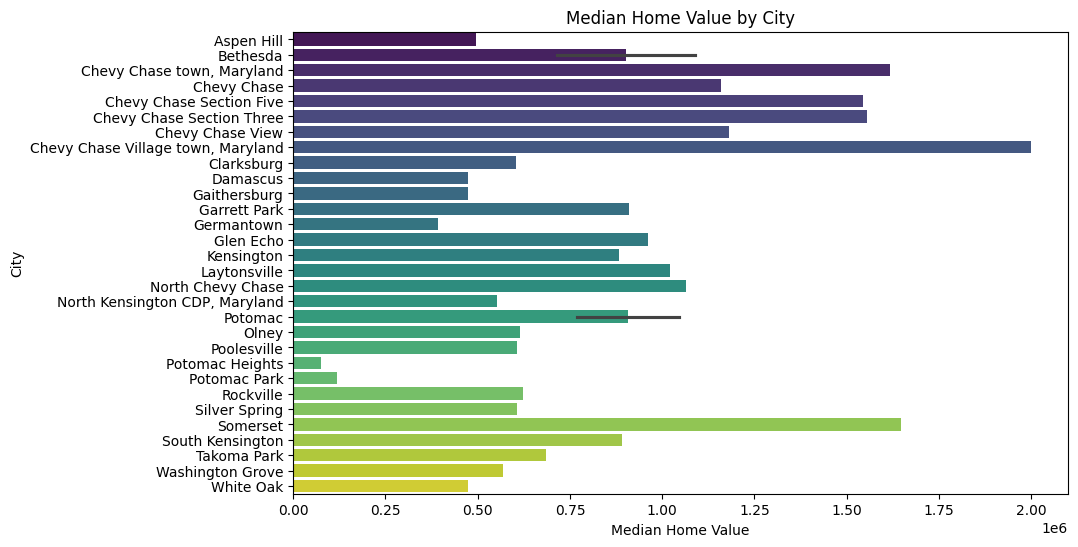

In [56]:
#Bar chart that shows the median value of homes per cities
plt.figure(figsize=(10, 6))
sns.barplot(x='Median Home Value', y='City', data=df, orient='h', palette='viridis')
plt.title('Median Home Value by City')
plt.xlabel('Median Home Value')
plt.ylabel('City')
plt.show()

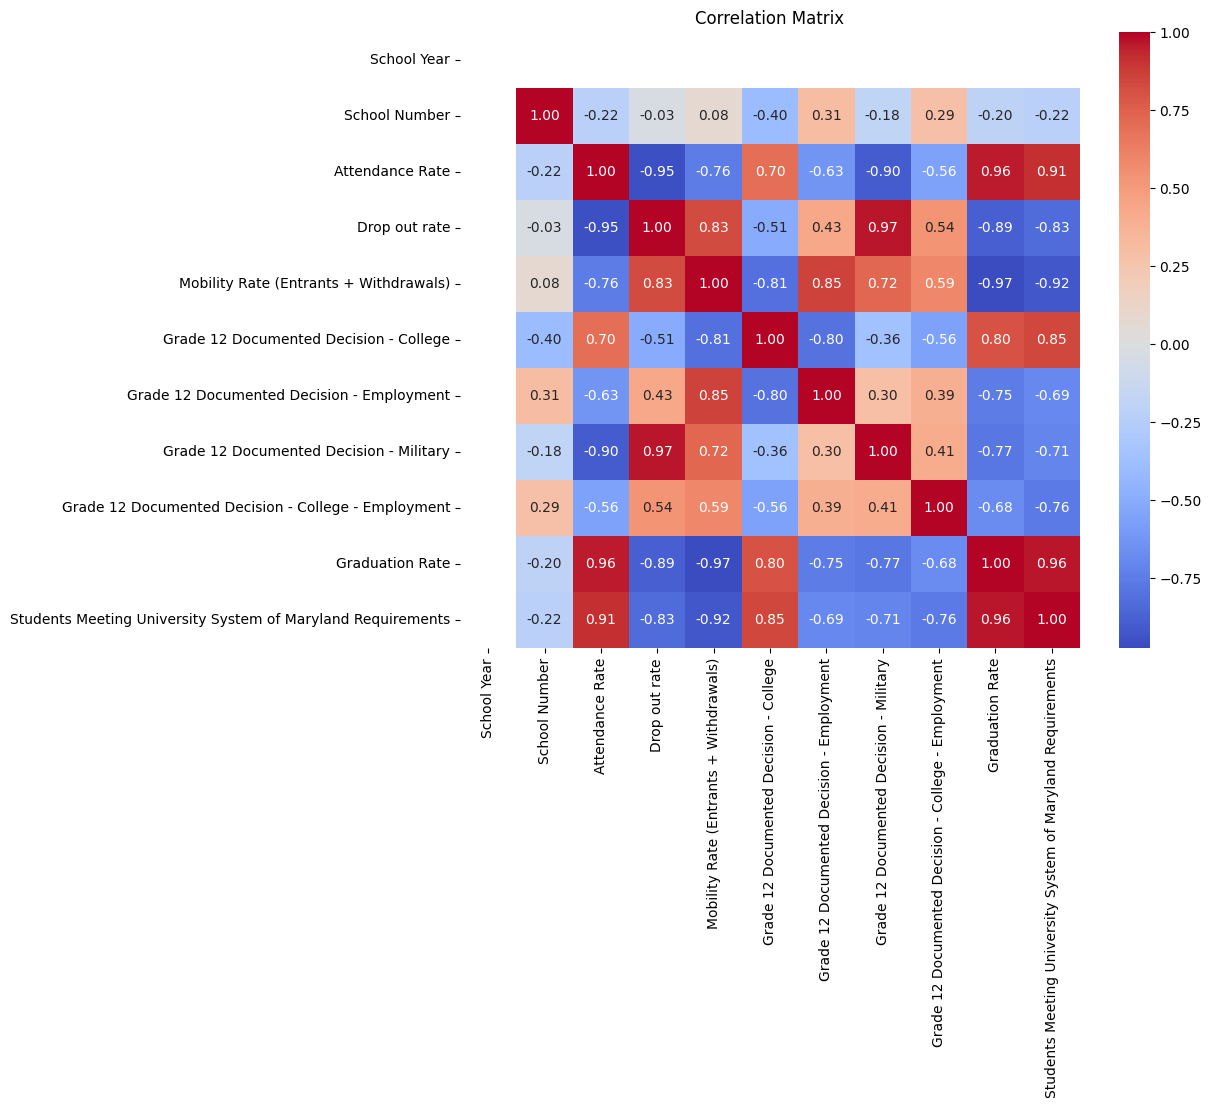

In [57]:
# Correlation matrix between numerical values in 'school'
correlation_matrix = school.select_dtypes(include=np.number).corr()  # Selects only numerical columns

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()